### `Pergunta 5`: Qual o total de vendas por trimestre do estado de São Paulo?

In [1]:
# Definindo a paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

In [3]:
vendas = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\relatorio_vendas.csv',
    sep=','
)

vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format=r'%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_pedido'], format=r'%Y-%m-%d')
vendas['tipo_produto'] = vendas['tipo_produto'].apply(lambda x: x.capitalize())

In [4]:
# display(vendas.head(2))

In [5]:
# Variáveis de interesse: Intervalo de tempo (trimestral), Estado de São Paulo, Vendas.

df_sp = vendas.copy(deep=True)
df_sp = df_sp.query(
    "estado == 'São Paulo'"
)[['data_pedido', 'vendas']]
df_sp = df_sp.set_index('data_pedido')
df_sp = df_sp.resample('QE-DEC').agg('sum') # Somando todos os valores de cada trimestre
df_sp['vendas'] = round(df_sp['vendas'] / 1e3, 2) # Transformação dos valores brutos
df_sp.rename(columns={'vendas': 'vendas (k)'}) # Renomeação da coluna
df_sp = df_sp.reset_index() # Restauração do índice para ser utilizado no plot

In [6]:
df_sp.head(5)

,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13


In [7]:
def grafico_vendas_sp_tri():
    fig, ax = plt.subplots(figsize=(14, 4))

    pontos_a_marcar = [
        True if mes == 12 else False for mes in df_sp['data_pedido'].dt.month
    ]

    ax.plot(df_sp['data_pedido'], df_sp['vendas'],
            lw=3, color=AZUL5, marker='o',
            markersize=10, markerfacecolor=AZUL2,
            markevery=pontos_a_marcar)
    
    # Personalização do gráfico

    ax.set_title('Vendas por trimestre no estado de São Paulo',
                 fontsize=14, color='black')
    ax.text(0.36, 0.95, 'De 2016 à 2019 (em milhares de reais)',
            transform=ax.transAxes, color='black', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])      
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    ax.tick_params(axis='both', which='both', length=0)
    plt.ylim(0, 400)


    return ax


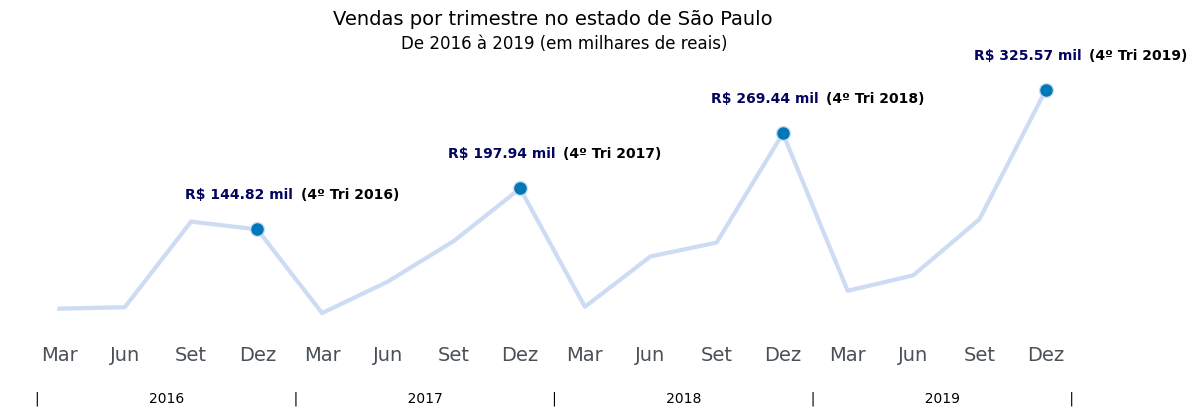

In [8]:
ax = grafico_vendas_sp_tri()

# Formatador de localização

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%b'))
x_labels = ['Mar', 'Jun', 'Set', 'Dez'] * 4
ax.set_xticks(df_sp['data_pedido'])
ax.set_xticklabels(x_labels, ha='center')

texto = [25*' ' + str(i) + 25*' ' for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, -80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|')

for ano, i in enumerate(range(3, len(df_sp['vendas']), 4)):
    ax.text(x=ax.get_xticks()[i] - 100,
            y=df_sp['vendas'][i] + 40,
            s=f'R$ {df_sp['vendas'][i]} mil',
            color=AZUL1,
            weight='bold', fontsize=10)

    ax.text(x=ax.get_xticks()[i] + 160 - 100,
            y=df_sp["vendas"][i] + 40,
            s=f"(4º Tri {2016 + ano})",
            weight="bold", fontsize = 10)


### `Pergunta 6`: Qual o faturamento por trimestre em cada região?

In [9]:
# Separando as vendas por região

vendas[['vendas', 'regiao']].groupby(by='regiao').agg('sum').sort_values(by='vendas',ascending=False)

,vendas
regiao,
Sudeste,3723208.08
Nordeste,1701430.75
Centro-Oeste,736718.52
Norte,504766.47
Sul,414875.73


In [10]:
# Variáveis de interesse: vendas, data, regiões.

df_regiao = vendas.copy(deep=True)
df_regiao = vendas[['data_pedido', 'vendas', 'regiao']]

df_regiao = pd.crosstab(index=df_regiao['data_pedido'],
                        columns=df_regiao['regiao'],
                        values=df_regiao['vendas'],
                        aggfunc='sum')
df_regiao = df_regiao[['Sudeste', 'Nordeste',
                       'Centro-Oeste', 'Norte',
                       'Sul']]

In [11]:
df_regiao = df_regiao.resample('QE').agg('sum')
df_regiao = round(df_regiao / 1e3, 2)
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [12]:
fig = px.line(data_frame=df_regiao,
              x=df_regiao.index,
              y=df_regiao.columns,
              markers=True,
              labels={'regiao', 'Região'},
              color_discrete_sequence=[AZUL2, VERMELHO1,
                                       AMARELO1, VERDE1,
                                       CINZA3])

# Personalização do gráfico

fig.update_layout(width=1300, height=600,
                  font_family='DejaVu Sans',
                  font_size=15,
                  font_color=CINZA2,
                  title_font_color=CINZA1,
                  title_font_size=24,
                  title_text='Faturamento da loja de departamentos por trimestre' + '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor=CINZA5)

fig.update_yaxes(tickprefix='R$ ', ticksuffix=' mil')

labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019']

fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)

# Personalização do hover

fig.update_traces(mode='markers+lines',
                  hovertemplate=r'<b>Período:<b> %{x} <br><b>Faturamento:<b> %{y}')
# fig.update_layout(hovermode='closest')
# fig.update_layout(hovermode='x')
fig.update_layout(hovermode='x unified')

fig.show()